In [1]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

Using TensorFlow backend.


In [2]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

11493376/11490434 [==============================] - 1s 0us/step



Epoch 00001: val_loss improved from inf to 0.05504, saving model to ./model/01-0.0550.hdf5

Epoch 00002: val_loss improved from 0.05504 to 0.04001, saving model to ./model/02-0.0400.hdf5

Epoch 00003: val_loss improved from 0.04001 to 0.03219, saving model to ./model/03-0.0322.hdf5

Epoch 00004: val_loss did not improve from 0.03219

Epoch 00005: val_loss improved from 0.03219 to 0.03213, saving model to ./model/05-0.0321.hdf5

Epoch 00006: val_loss improved from 0.03213 to 0.02670, saving model to ./model/06-0.0267.hdf5

Epoch 00007: val_loss did not improve from 0.02670

Epoch 00008: val_loss did not improve from 0.02670

Epoch 00009: val_loss improved from 0.02670 to 0.02628, saving model to ./model/09-0.0263.hdf5

Epoch 00010: val_loss did not improve from 0.02628

Epoch 00011: val_loss improved from 0.02628 to 0.02553, saving model to ./model/11-0.0255.hdf5

Epoch 00012: val_loss improved from 0.02553 to 0.02373, saving model to ./model/12-0.0237.hdf5

Epoch 00013: val_loss did n

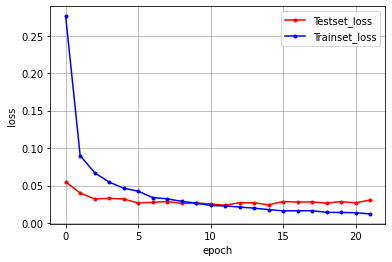

In [3]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()